<a href="https://colab.research.google.com/github/nguyenthanhphat-144/Tuan4/blob/main/Tu%E1%BA%A7n4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx matplotlib numpy

In [6]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Đã chọn file:", filename)

Saving Matrix.txt to Matrix (1).txt
Đã chọn file: Matrix (1).txt


=== Ma trận kề đã đọc ===
[[0 1 1]
 [1 0 1]
 [1 1 0]]

=== Kết quả tô màu ===
Đỉnh 0 → Màu 0
Đỉnh 1 → Màu 1
Đỉnh 2 → Màu 2


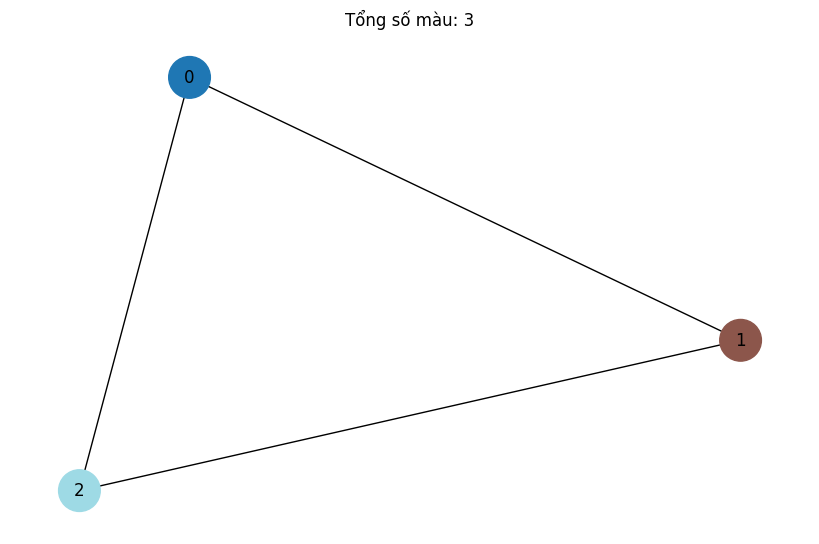

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def read_adj_matrix(path: str) -> np.ndarray:
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue
            parts = line.replace(",", " ").split()
            rows.append([int(x) for x in parts])

    n = len(rows[0])
    for i, r in enumerate(rows):
        if len(r) != n:
            raise ValueError(f"Hàng {i} không đúng kích thước.")

    return np.array(rows)


def build_graph(adj: np.ndarray) -> nx.Graph:
    """Tạo graph từ ma trận kề."""
    n = adj.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] or adj[j][i]:
                G.add_edge(i, j)
    return G


def color_graph(G: nx.Graph):
    """Tô màu đồ thị bằng greedy."""
    return nx.coloring.greedy_color(G, strategy="largest_first")


def draw_graph(G: nx.Graph, colors: dict):
    """Vẽ đồ thị ra màn hình cùng thông tin màu."""
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    list_colors = list(colors.values())
    max_c = max(list_colors)

    node_color = [cmap(c / max_c) for c in list_colors]

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=900)
    plt.title(f"Tổng số màu: {len(set(list_colors))}")
    plt.show()
    adj = read_adj_matrix(filename)

adj = read_adj_matrix(filename)

print("=== Ma trận kề đã đọc ===")
print(adj)

G = build_graph(adj)

colors = color_graph(G)

print("\n=== Kết quả tô màu ===")
for node in sorted(colors):
    print(f"Đỉnh {node} → Màu {colors[node]}")

draw_graph(G, colors)

In [9]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Đã chọn file:", filename)

Saving Matrix2.txt to Matrix2.txt
Đã chọn file: Matrix2.txt


In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def doc_ma_tran(file_path: str) -> np.ndarray:

    du_lieu = []

    with open(file_path, "r", encoding="utf-8") as f:
        for dong in f:
            dong = dong.strip()
            if not dong or dong.startswith("#"):
                continue

            parts = dong.replace(",", " ").split()
            du_lieu.append([int(x) for x in parts])

    n = len(du_lieu[0])
    for i, row in enumerate(du_lieu):
        if len(row) != n:
            raise ValueError(f"Dòng {i} không cùng kích thước ma trận.")

    return np.array(du_lieu)


def tao_do_thi(adj: np.ndarray) -> nx.Graph:
    """
    Tạo đồ thị vô hướng từ ma trận kề.
    """
    n = adj.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] or adj[j][i]:
                G.add_edge(i, j)

    return G

In [11]:
def to_mau_do_thi(G: nx.Graph) -> dict:

    return nx.coloring.greedy_color(G, strategy="largest_first")

In [12]:
def hien_thi_do_thi(G: nx.Graph, colors: dict):

    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    ds_mau = list(colors.values())
    max_c = max(ds_mau) if ds_mau else 1
    col_map = [cmap(c / max_c) for c in ds_mau]

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, node_color=col_map, with_labels=True, node_size=800)

    plt.title(f"Số màu sử dụng: {len(set(ds_mau))}")
    plt.show()


Nhập tên file txt ma trận kề: Matrix2.txt

=== Ma trận kề ===
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]]

=== Kết quả tô màu ===
Đỉnh 0 → Màu 2
Đỉnh 1 → Màu 0
Đỉnh 2 → Màu 1
Đỉnh 3 → Màu 2


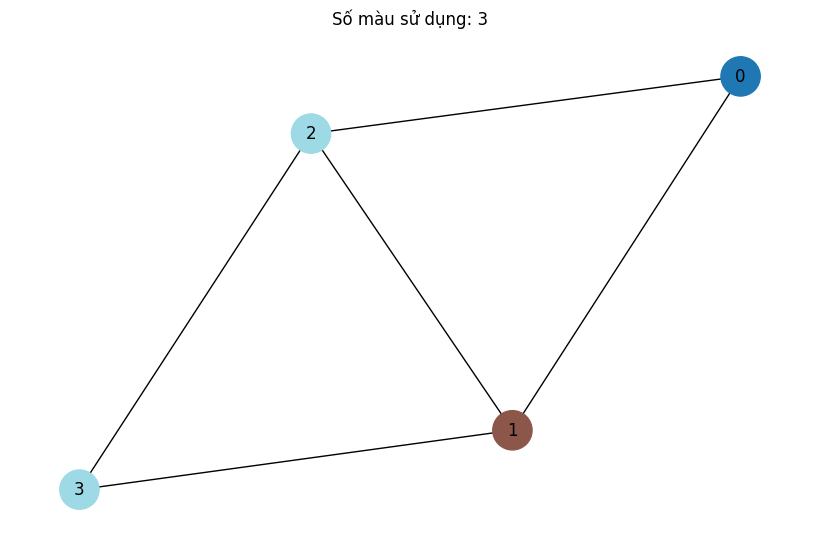

In [15]:
def main():
    file_path = input("Nhập tên file txt ma trận kề: ")

    try:
        adj = doc_ma_tran(file_path)
    except Exception as e:
        print(" Lỗi đọc file:", e)
        return

    print("\n=== Ma trận kề ===")
    print(adj)

    G = tao_do_thi(adj)
    colors = to_mau_do_thi(G)

    print("\n=== Kết quả tô màu ===")
    for node in sorted(colors):
        print(f"Đỉnh {node} → Màu {colors[node]}")

    hien_thi_do_thi(G, colors)


if __name__ == "__main__":
    main()

In [16]:
#Bài 3
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def tsp_held_karp(cost):
    n = len(cost)
    dp = [[float('inf')] * n for _ in range(1 << n)]
    parent = [[-1] * n for _ in range(1 << n)]

    dp[1][0] = 0

    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            for v in range(n):
                if mask & (1 << v):
                    continue
                if cost[u][v] == 0:
                    continue
                new_mask = mask | (1 << v)
                new_cost = dp[mask][u] + cost[u][v]
                if new_cost < dp[new_mask][v]:
                    dp[new_mask][v] = new_cost
                    parent[new_mask][v] = u

    mask_all = (1 << n) - 1
    best_cost = float('inf')
    last = -1
    for i in range(1, n):
        if dp[mask_all][i] + cost[i][0] < best_cost:
            best_cost = dp[mask_all][i] + cost[i][0]
            last = i

    path = [0]
    curr = last
    mask = mask_all
    while curr != 0:
        path.append(curr)
        prev = parent[mask][curr]
        mask ^= (1 << curr)
        curr = prev
    path.append(0)
    path.reverse()

    return best_cost, path

    def build_graph(cost):

      n = len(cost)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if cost[i][j] != 0:
                G.add_edge(i, j, weight=cost[i][j])
    return G

    def draw_tsp_graph(G, tsp_path):
      pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    node_colors_idx = list(range(len(G.nodes())))
    node_colors = [cmap(i / max(node_colors_idx)) for i in node_colors_idx]
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    labels = {n: f"{n}\nC{node_colors_idx[n]}" for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_color="white")

    path_edges = [(tsp_path[i], tsp_path[i + 1]) for i in range(len(tsp_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title(f"TSP Held-Karp + Chu trình tối ưu (Red path)")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    cost = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])

    best_cost, path = tsp_held_karp(cost)

In [17]:
#Bài 4
import random
import copy
import math

POPULATION_SIZE = 100
GENERATIONS = 300
PC = 0.8
PM = 0.05

DAYS = 5
SLOTS_PER_DAY = 6
TOTAL_SLOTS = DAYS * SLOTS_PER_DAY

TEACHERS = {
    'G1': 'Toán', 'G2': 'Toán', 'G3': 'Toán',
    'G4': 'Tin', 'G5': 'Tin'
}
CLASSES = ['10A', '10B', '11A', '11B', '12A', '12B']
SUBJECTS = {'Toán': 4, 'Tin': 2}
ALL_TEACHERS = list(TEACHERS.keys())
TEACHER_SUBJECTS = {g: s for g, s in TEACHERS.items()}

CHROMOSOME_LENGTH = len(CLASSES) * TOTAL_SLOTS

class ScheduleGA:

    def __init__(self):
        self.best_solution = None
        self.best_fitness = -1.0

    def initialize_population(self):
        population = []
        for _ in range(POPULATION_SIZE):
            chromosome = []
            for _ in range(CHROMOSOME_LENGTH):
                teacher_id = random.choice(ALL_TEACHERS)
                chromosome.append(teacher_id)
            population.append({'chromosome': chromosome, 'fitness': 0.0})
        return population

    def get_slot_info(self, index):
        class_index = index // TOTAL_SLOTS
        slot_in_week = index % TOTAL_SLOTS
        day = slot_in_week // SLOTS_PER_DAY
        slot_time = slot_in_week % SLOTS_PER_DAY

        return CLASSES[class_index], day, slot_time

    def evaluate_fitness(self, chromosome):
        penalty = 0

        schedule_matrix = {}

        for i, teacher_id in enumerate(chromosome):
            class_name, day, slot_time = self.get_slot_info(i)
            subject = TEACHER_SUBJECTS[teacher_id]

            slot_key = (day, slot_time)
            if slot_key not in schedule_matrix:
                schedule_matrix[slot_key] = []
            schedule_matrix[slot_key].append({'class': class_name, 'teacher': teacher_id, 'subject': subject})

            teachers_in_slot = [s['teacher'] for s in schedule_matrix[slot_key]]
            if teachers_in_slot.count(teacher_id) > 1:
                penalty += 1000

            classes_in_slot = [s['class'] for s in schedule_matrix[slot_key]]
            if classes_in_slot.count(class_name) > 1:
                penalty += 1000

        actual_subject_counts = {cls: {'Toán': 0, 'Tin': 0} for cls in CLASSES}
        for i, teacher_id in enumerate(chromosome):
            class_name, _, _ = self.get_slot_info(i)
            subject = TEACHER_SUBJECTS[teacher_id]
            actual_subject_counts[class_name][subject] += 1

        for cls, counts in actual_subject_counts.items():
            for sub, required in SUBJECTS.items():
                diff = abs(counts.get(sub, 0) - required)
                penalty += diff * 50

        daily_teacher_load = {}
        for i, teacher_id in enumerate(chromosome):
            _, day, _ = self.get_slot_info(i)
            key = (teacher_id, day)
            daily_teacher_load[key] = daily_teacher_load.get(key, 0) + 1

        for load in daily_teacher_load.values():
            if load > 5:
                penalty += (load - 5) * 20

        if penalty == 0:
            return math.inf
        else:
            return 1 / penalty

    def find_best_chromosome(self, population):
        population.sort(key=lambda x: x['fitness'], reverse=True)
        return population[0]

    def selection(self, population, k=5):
        selected_parents = []
        for _ in range(POPULATION_SIZE):
            tournament = random.sample(population, k)
            tournament.sort(key=lambda x: x['fitness'], reverse=True)
            selected_parents.append(tournament[0])
        return selected_parents

    def crossover(self, parent1, parent2):
        if random.random() < PC:
            point = random.randint(1, CHROMOSOME_LENGTH - 1)
            child1 = parent1['chromosome'][:point] + parent2['chromosome'][point:]
            child2 = parent2['chromosome'][:point] + parent1['chromosome'][point:]
            return {'chromosome': child1, 'fitness': 0.0}, {'chromosome': child2, 'fitness': 0.0}
        else:
            return copy.deepcopy(parent1), copy.deepcopy(parent2)

    def mutate(self, chromosome_dict):
        chromosome = chromosome_dict['chromosome']
        if random.random() < PM:
            idx1, idx2 = random.sample(range(CHROMOSOME_LENGTH), 2)

            chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
            chromosome_dict['fitness'] = 0.0
        return chromosome_dict

    def run(self):
        population = self.initialize_population()

        for gen in range(GENERATIONS):

            for chromo in population:
                if chromo['fitness'] == 0.0:
                    chromo['fitness'] = self.evaluate_fitness(chromo['chromosome'])

            current_best = self.find_best_chromosome(population)
            if current_best['fitness'] > self.best_fitness:
                self.best_fitness = current_best['fitness']
                self.best_solution = current_best['chromosome']

            if self.best_fitness == math.inf:
                break

            parents = self.selection(population)

            new_population = []

            new_population.append(copy.deepcopy(self.find_best_chromosome(population)))

            for i in range((POPULATION_SIZE - 1) // 2):
                p1 = parents[i]
                p2 = parents[i + (POPULATION_SIZE // 2)]

                c1_dict, c2_dict = self.crossover(p1, p2)

                c1_dict = self.mutate(c1_dict)
                c2_dict = self.mutate(c2_dict)

                new_population.append(c1_dict)
                if len(new_population) < POPULATION_SIZE:
                    new_population.append(c2_dict)

            population = new_population

        return self.best_solution, self.best_fitness

def display_schedule(chromosome, ga_instance):
    print("\n--- LỊCH DẠY TỐT NHẤT ---")

    final_schedule = {cls: {day: [''] * SLOTS_PER_DAY for day in range(DAYS)} for cls in CLASSES}

    for i, teacher_id in enumerate(chromosome):
        class_name, day, slot_time = ga_instance.get_slot_info(i)
        subject = TEACHER_SUBJECTS[teacher_id]

        day_names = ["T2", "T3", "T4", "T5", "T6"]

        final_schedule[class_name][day][slot_time] = f"{subject} ({teacher_id})"

    for cls in CLASSES:
        print(f"\n+++ Lớp {cls} +++")
        header = f"| Tiết | {' | '.join(day_names)} |"
        print("-" * len(header))
        print(header)
        print("-" * len(header))

        for slot_time in range(SLOTS_PER_DAY):
            row = [f" {slot_time + 1}  "]
            for day in range(DAYS):
                row.append(f"{final_schedule[cls][day][slot_time]:<12}")
            print("|" + "|".join(row) + "|")
        print("-" * len(header))


if __name__ == '__main__':
    ga = ScheduleGA()
    best_chromo, best_fit = ga.run()

    if best_fit > 0:
        display_schedule(best_chromo, ga)
        print(f"\nFitness Cuối cùng: {best_fit:.6f}")
    else:
        print("\nKhông tìm thấy lịch dạy hợp lệ.")


--- LỊCH DẠY TỐT NHẤT ---

+++ Lớp 10A +++
---------------------------------
| Tiết | T2 | T3 | T4 | T5 | T6 |
---------------------------------
| 1  |Toán (G1)   |Toán (G2)   |Toán (G3)   |Tin (G4)    |Toán (G3)   |
| 2  |Toán (G3)   |Tin (G5)    |Tin (G5)    |Toán (G3)   |Toán (G2)   |
| 3  |Tin (G4)    |Tin (G4)    |Tin (G5)    |Toán (G2)   |Toán (G2)   |
| 4  |Tin (G5)    |Tin (G5)    |Tin (G4)    |Toán (G2)   |Toán (G1)   |
| 5  |Tin (G4)    |Toán (G2)   |Toán (G3)   |Toán (G1)   |Tin (G4)    |
| 6  |Toán (G3)   |Toán (G3)   |Tin (G5)    |Tin (G4)    |Toán (G2)   |
---------------------------------

+++ Lớp 10B +++
---------------------------------
| Tiết | T2 | T3 | T4 | T5 | T6 |
---------------------------------
| 1  |Tin (G5)    |Toán (G1)   |Tin (G5)    |Toán (G1)   |Tin (G5)    |
| 2  |Tin (G4)    |Toán (G2)   |Toán (G2)   |Tin (G5)    |Toán (G3)   |
| 3  |Toán (G1)   |Toán (G1)   |Tin (G4)    |Tin (G4)    |Tin (G4)    |
| 4  |Toán (G2)   |Toán (G2)   |Toán (G3)   |Tin (G4)